In [1]:
import torch
import torch.nn as nn

In [2]:
torch.cuda.is_available()

True

In [ ]:
class MyModel(nn.Module):
    def __init__(self, in_features=100, num_classes=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features=in_features, out_features=100)
        self.fc2 = nn.Linear(in_features=100, out_features=50)
        self.output_layer = nn.Linear(in_features=50, out_features=num_classes)

    def forward(self, x):
        x1 = self.fc1(x)
        x2 = self.fc2(x1)
        return self.output_layer(x2)

In [108]:
# from torchsummary import summary
from torchinfo import summary


summary(model2, (1, 100,))

Layer (type:depth-idx)                   Output Shape              Param #
MyModel2                                 [1, 10]                   --
├─Sequential: 1-1                        [1, 10]                   --
│    └─Linear: 2-1                       [1, 100]                  10,100
│    └─ReLU: 2-2                         [1, 100]                  --
│    └─Linear: 2-3                       [1, 50]                   5,050
│    └─ReLU: 2-4                         [1, 50]                   --
│    └─Linear: 2-5                       [1, 10]                   510
Total params: 15,660
Trainable params: 15,660
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.06
Estimated Total Size (MB): 0.06

In [40]:
import torchvision

mnist = torchvision.datasets.MNIST(root='.', download=True)

In [43]:
x, y = mnist._load_data()

In [45]:
x.shape, y.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [46]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'tensor(8)')

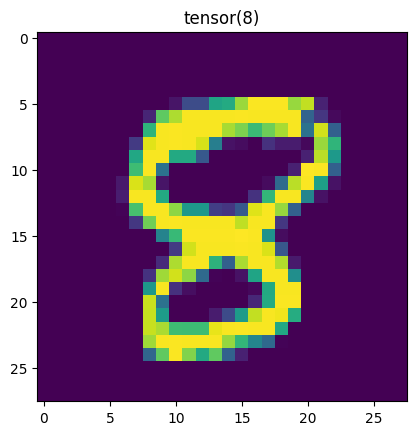

In [55]:
import random

idx = random.randint(0, x.shape[0])

plt.imshow(x[idx])
plt.title(y[idx])

In [56]:
type(x), type(y)

(torch.Tensor, torch.Tensor)

In [57]:
x[0].shape

torch.Size([28, 28])

In [58]:
28 *28

784

In [94]:
class MyModel2(nn.Module):
    def __init__(self, in_features=100, num_classes=10):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=in_features, out_features=100),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=100, out_features=50),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=50, out_features=num_classes)
        )

    def forward(self, x):
        return self.seq(x)

model = MyModel2(in_features=784).to('cuda')
list(model.parameters())
# summary(model, (32, (28, 28),))

[Parameter containing:
 tensor([[-0.0196,  0.0038, -0.0165,  ...,  0.0186,  0.0190,  0.0238],
         [-0.0114,  0.0348,  0.0343,  ..., -0.0113,  0.0220, -0.0101],
         [ 0.0241, -0.0062,  0.0277,  ...,  0.0168, -0.0253, -0.0054],
         ...,
         [ 0.0177, -0.0320, -0.0022,  ...,  0.0147,  0.0138, -0.0057],
         [-0.0082,  0.0023,  0.0157,  ..., -0.0247, -0.0087, -0.0057],
         [-0.0289,  0.0269, -0.0085,  ..., -0.0281,  0.0096, -0.0134]],
        device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-0.0350,  0.0231, -0.0082, -0.0103, -0.0203,  0.0226,  0.0348,  0.0146,
          0.0034, -0.0207,  0.0232, -0.0033, -0.0166,  0.0136,  0.0070, -0.0331,
          0.0093, -0.0046,  0.0092, -0.0250, -0.0014,  0.0254,  0.0092,  0.0043,
          0.0209, -0.0098,  0.0022, -0.0125, -0.0091,  0.0282, -0.0312, -0.0297,
         -0.0342,  0.0175,  0.0104,  0.0264, -0.0159, -0.0090,  0.0105, -0.0285,
         -0.0005,  0.0025, -0.0233, -0.0058,  0.0199,  0.0082,

In [114]:
for parameters in model.parameters():
    print(parameters.shape)

torch.Size([100, 784])
torch.Size([100])
torch.Size([50, 100])
torch.Size([50])
torch.Size([10, 50])
torch.Size([10])


In [106]:
xa = x[0].type(torch.float32).to('cuda')
xa = xa.unsqueeze(0)
# xa

In [150]:
model(xa)

tensor([[ -1.5520,  -1.3612,  -0.9038,  31.0500, -22.8875,  37.3098,  14.6757,
         -19.3566,   8.6605,  -0.7909]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [152]:
with torch.inference_mode():
    print(model(xa))

tensor([[ -1.5520,  -1.3612,  -0.9038,  31.0500, -22.8875,  37.3098,  14.6757,
         -19.3566,   8.6605,  -0.7909]], device='cuda:0')


1. Model                                        X
2. Training Data                                X
3. Evaluation Data (Validaion data)             X
4. Evaluation Metrics                           []
5. Optimizer                                    X
6. Loss Function                                X
7. Training Loop
    - Training
    - Validation

In [ ]:
train_x, train_y = torchvision.datasets.MNIST(root='.', download=True, train=True)._load_data()
test_x, test_y = torchvision.datasets.MNIST(root='.', download=True, train=False)._load_data()

train_x.shape, train_y.shape, test_x.shape, test_y.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

In [119]:
train_x.dtype, train_y.dtype

(torch.uint8, torch.int64)

In [142]:
train_x = train_x[:10000].type(torch.float32)
train_y = train_y[:10000].type(torch.LongTensor)

test_x = test_x.type(torch.float32)
test_y = test_y.type(torch.LongTensor)

In [153]:
model = MyModel2(in_features=784).to('cuda')

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

In [140]:
60000 / 128

468.75

In [ ]:
import numpy as np
num_epochs = 10
batch_size = 128

num_train = train_x.shape[0]
print(num_train)


def train_epoch(images, labels):
    model.train()
    losses = []
    num_train = images.shape[0]
    for i in range(0, num_train, batch_size):
        x = images[i:i+batch_size].to('cuda')
        y = labels[i:i+batch_size].to('cuda')

        outputs = model(x)
        loss = loss_fn(outputs, y)
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return np.mean(losses)


def validation_epoch(images, labels):
    model.eval()
    losses = []
    num_samples = images.shape[0]
    for i in range(0, num_samples, batch_size):
        x = images[i:i+batch_size].to('cuda')
        y = labels[i:i+batch_size].to('cuda')

        with torch.inference_mode():
            outputs = model(x)
        loss = loss_fn(outputs, y)

        losses.append(loss.item())
    return np.mean(losses)


for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    
    loss = train_epoch(images=train_x, labels=train_y)
    val_loss = validation_epoch(test_x, test_y)
    
    print(f'Train Loss: {loss:0.4f} | Val Loss: {val_loss:0.4f}')


10000
Epoch 1/10
0.042135272175073624
0.0821027159690857
0.019203148782253265
0.0452568493783474
0.01947234757244587
0.0685286819934845
0.029838455840945244
0.06053156778216362
0.042169421911239624
0.10254160314798355
0.05106246843934059
0.01597290299832821
0.0770055428147316
0.02155301161110401
0.050034601241350174
0.1258963793516159
0.021164502948522568
0.04429895058274269
0.03302150219678879
0.014018157497048378
0.02627362124621868
0.017805838957428932
0.02417607419192791
0.01621570810675621
0.030730420723557472
0.05374198779463768
0.01992550678551197
0.06485239416360855
0.04019809141755104
0.03909135237336159
0.011134200729429722
0.011058266274631023
0.031411606818437576
0.010303376242518425
0.0510086789727211
0.024050306528806686
0.04568205401301384
0.04680899530649185
0.022493690252304077
0.08162742108106613
0.04195510968565941
0.02054605633020401
0.02347537875175476
0.08523828536272049
0.05295921117067337
0.09771335870027542
0.019163792952895164
0.043286580592393875
0.0389852486

In [ ]:
# accuracy